In [2]:
import pandas as pd
df=pd.read_csv("Downloads/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model_no_reg=Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_no_reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
history_no_reg=model_no_reg.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
16/16 [==============================] - 1s 25ms/step - loss: 0.6831 - accuracy: 0.5540 - val_loss: 0.6057 - val_accuracy: 0.7480
Epoch 2/10
16/16 [==============================] - 0s 6ms/step - loss: 0.5832 - accuracy: 0.7454 - val_loss: 0.5618 - val_accuracy: 0.7480
Epoch 3/10
16/16 [==============================] - 0s 6ms/step - loss: 0.5310 - accuracy: 0.7637 - val_loss: 0.5304 - val_accuracy: 0.7480
Epoch 4/10
16/16 [==============================] - 0s 6ms/step - loss: 0.4969 - accuracy: 0.7739 - val_loss: 0.5057 - val_accuracy: 0.7561
Epoch 5/10
16/16 [==============================] - 0s 6ms/step - loss: 0.4753 - accuracy: 0.7800 - val_loss: 0.4887 - val_accuracy: 0.7642
Epoch 6/10
16/16 [==============================] - 0s 6ms/step - loss: 0.4638 - accuracy: 0.7800 - val_loss: 0.4759 - val_accuracy: 0.7724
Epoch 7/10
16/16 [==============================] - 0s 5ms/step - loss: 0.4519 - accuracy: 0.7862 - val_loss: 0.4765 - val_accuracy: 0.7642
Epoch 8/10
16/16 [=

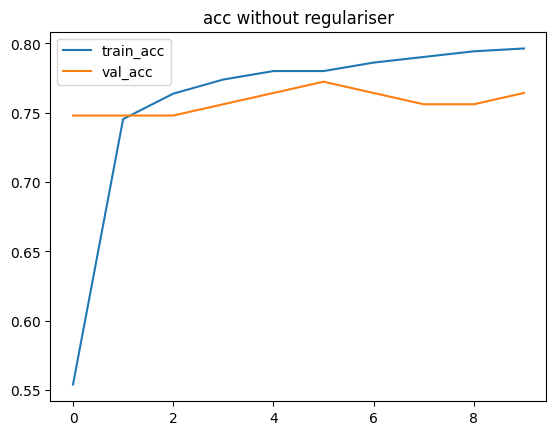

In [12]:
import matplotlib.pyplot as plt
plt.plot(history_no_reg.history['accuracy'],label='train_acc')
plt.plot(history_no_reg.history['val_accuracy'], label='val_acc')
plt.legend()
plt.legend()
plt.title('acc without regulariser')
plt.show()

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

model_with_reg=Sequential([
    Dense(256,input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.02)),
    Dense(1, activation='sigmoid')
])

model_with_reg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_with_reg=model_with_reg.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
16/16 [==============================] - 1s 23ms/step - loss: 2.4305 - accuracy: 0.6619 - val_loss: 2.1135 - val_accuracy: 0.6992
Epoch 2/10
16/16 [==============================] - 0s 9ms/step - loss: 1.8563 - accuracy: 0.7413 - val_loss: 1.6432 - val_accuracy: 0.7073
Epoch 3/10
16/16 [==============================] - 0s 8ms/step - loss: 1.4432 - accuracy: 0.7556 - val_loss: 1.2892 - val_accuracy: 0.7480
Epoch 4/10
16/16 [==============================] - 0s 8ms/step - loss: 1.1460 - accuracy: 0.7821 - val_loss: 1.0484 - val_accuracy: 0.7480
Epoch 5/10
16/16 [==============================] - 0s 7ms/step - loss: 0.9384 - accuracy: 0.7882 - val_loss: 0.8829 - val_accuracy: 0.7398
Epoch 6/10
16/16 [==============================] - 0s 7ms/step - loss: 0.8079 - accuracy: 0.7800 - val_loss: 0.7633 - val_accuracy: 0.7317
Epoch 7/10
16/16 [==============================] - 0s 7ms/step - loss: 0.6978 - accuracy: 0.7800 - val_loss: 0.6794 - val_accuracy: 0.7561
Epoch 8/10
16/16 [=

5/5 [==============================] - 0s 2ms/step - loss: 0.6167 - accuracy: 0.7662


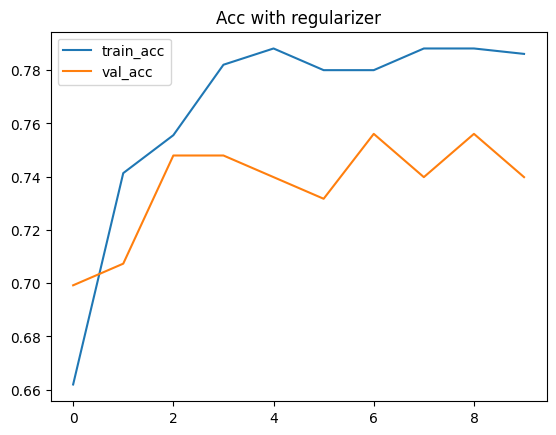

In [17]:
test_with_acc=model_with_reg.evaluate(X_test, y_test)
plt.plot(history_with_reg.history['accuracy'],label='train_acc')
plt.plot(history_with_reg.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title("Acc with regularizer")
plt.show()

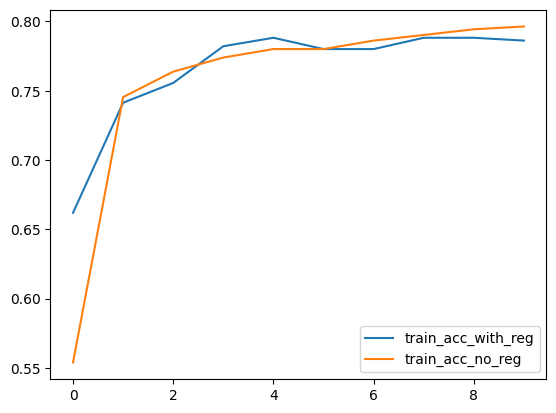

In [19]:
plt.plot(history_with_reg.history['accuracy'], label='train_acc_with_reg')
plt.plot(history_no_reg.history['accuracy'], label='train_acc_no_reg')
plt.legend()
plt.show()